<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00


In [2]:
from ephem import *
from pandas import *
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [3]:
lista = {
    "Merkur": Mercury(),
    "Neptun": Neptune(),
    "Pluton": Pluto(),
    "Halejeva": readdb("1P/Halley,e,162.2239,58.9763,111.9047,17.872265,0.0130447,0.966321,171.4710,02/10.0/2022,2000,g 4.0,6.0")
}

In [4]:
def pozicije_proba(bodies, years=100, start_date=None):
    if start_date is None:
        start_date = datetime.now()

    end_date = start_date + timedelta(days=years*365)
    dates = np.arange(start_date, end_date, timedelta(days=1)).astype(datetime)

    positions = {body: [] for body in lista}

    for date in dates:
        for body_name, body in lista.items():
            body.compute(date)
            positions[body_name].append((body.sun_distance, body.hlon))

    return dates, positions

start_date = datetime.now()
dates, positions = pozicije_proba(lista, years=100, start_date=start_date)


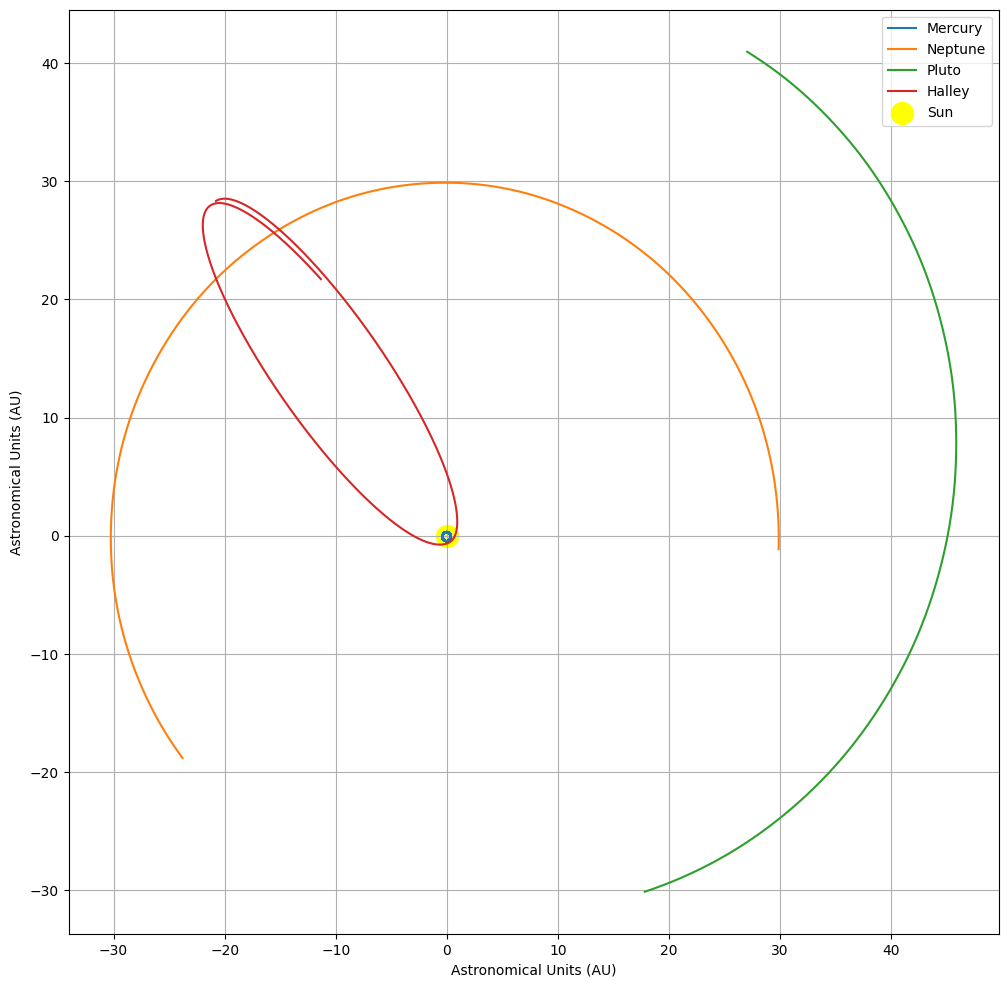

In [11]:
def pozicije(positions, years):
    plt.figure(figsize=(12, 12))

    for body_name, pos in positions.items():
        distances = [p[0] for p in pos]
        hlons = [p[1] for p in pos]
        x = [d * np.cos(h) for d, h in zip(distances, hlons)]
        y = [d * np.sin(h) for d, h in zip(distances, hlons)]
        plt.plot(x, y, label=body_name)

    plt.scatter([0], [0], color='yellow', s=250, label='Sun')  # Sunce u centru
    plt.xlabel('Astronomical Units (AU)')
    plt.ylabel('Astronomical Units (AU)')
    plt.legend()
    plt.grid(True)
    plt.show()

pozicije(positions, years=400)
